In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

* Optimized data has addtional features like mel spectrogram.

  * All Features in Optimized Data - Chroma features, MFCC, RMSE, Spectral features, Tonnetz, ZCR, Mel Spectrogram

In [ ]:
model_data = pd.read_csv("../Data/optimized_model_data.csv",header=[0,1,2],index_col=[0])

* Fixing multilevel genre_top column name.

In [ ]:
model_data.columns = pd.MultiIndex.from_tuples([('','','genre_top')]+model_data.columns.to_list()[1:])

In [ ]:
model_data.dropna(inplace=True)

In [ ]:
model_data

chroma_cens                                          \
                      kurtosis                                           
         genre_top          01        02        03        04        05   
track_id                                                                 
2          Hip-Hop    7.180653  5.230309  0.249321  1.347620  1.482478   
3          Hip-Hop    1.888963  0.760539  0.345297  2.295201  1.654031   
5          Hip-Hop    0.527563 -0.077654 -0.279610  0.685883  1.937570   
10             Pop    3.702245 -0.291193  2.196742 -0.234449  1.367364   
134        Hip-Hop    0.918445  0.674147  0.577818  1.281117  0.933746   
...            ...         ...       ...       ...       ...       ...   
155315        Rock   -0.319850  0.653044  1.300360 -0.606061 -1.109302   
155316        Rock   -0.490129  0.463834  2.321970 -0.084352  1.662914   
155317        Rock   -0.461559 -0.229601 -0.496632 -0.422033  0.130612   
155318        Rock    0.552473 -0.110498 -0.532014  0.263131 -0.224011   
155319        Rock   -0.176901  0.187208 -0.050664  0.368843  0.066005   

                                                  ...  mel_spec            \
                                                  ...       std             
                06        07        08        09  ...        90        91   
track_id                                          ...                       
2         0.531371  1.481593  2.691455  0.866868  ...  0.005500  0.004066   
3         0.067592  1.366848  1.054094  0.108103  ...  0.014708  0.019320   
5         0.880839 -0.923192 -0.927232  0.666617  ...  0.000010  0.000009   
10        0.998411  1.770694  1.604566  0.521217  ...  0.018939  0.015547   
134       0.078177  1.199204 -0.175223  0.925482  ...  0.000009  0.000008   
...            ...       ...       ...       ...  ...       ...       ...   
155315   -1.006683  0.059643  0.472580 -0.856436  ...  0.000922  0.000430   
155316    2.115189 -0.237794  5.695442  0.830353  ...  0.001007  0.000663   
155317   -0.263825 -0.628103 -0.082687 -0.229483  ...  0.002338  0.001594   
155318   -0.530972  1.713526  1.418444  1.325197  ...  0.003115  0.002223   
155319   -0.857354 -0.780860  0.626281 -0.630938  ...  0.002461  0.001665   

                                                                      \
                                                                       
                92        93        94        95        96        97   
track_id                                                               
2         0.003965  0.002347  0.001663  0.002632  0.001452  0.000114   
3         0.078528  0.072792  0.069122  0.013616  0.008447  0.001303   
5         0.000008  0.000006  0.000005  0.000007  0.000004  0.000002   
10        0.010535  0.006567  0.006368  0.003965  0.003788  0.002343   
134       0.000007  0.000009  0.000010  0.000009  0.000003  0.000002   
...            ...       ...       ...       ...       ...       ...   
155315    0.000138  0.000019  0.000003  0.000004  0.000004  0.000003   
155316    0.000429  0.000345  0.000208  0.000123  0.000121  0.000038   
155317    0.001051  0.000818  0.000603  0.000557  0.000391  0.000214   
155318    0.001846  0.001351  0.000899  0.000688  0.000458  0.000194   
155319    0.001135  0.000730  0.000473  0.000313  0.000198  0.000103   

                              
                              
                98        99  
track_id                      
2         0.000002  0.000002  
3         0.000003  0.000002  
5         0.000002  0.000001  
10        0.001213  0.000316  
134       0.000002  0.000001  
...            ...       ...  
155315    0.000003  0.000002  
155316    0.000002  0.000001  
155317    0.000067  0.000098  
155318    0.000042  0.000019  
155319    0.000006  0.000005  

[32239 rows x 1415 columns]

* Separating the target variable from the feature set and converting the target labels into their corresponding numerical representations for our model.

In [ ]:
dictGenre = {"Rock":0,"Electronic":1,"Pop":2,"Hip-Hop":3,"Folk":4}

In [ ]:
X = model_data.drop([('','','genre_top')],axis=1)
y = model_data['','','genre_top'].replace(dictGenre)

/var/folders/gv/571nb6gs4h58lv0gw0__gy280000gn/T/ipykernel_13764/1149637687.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = model_data['','','genre_top'].replace(dictGenre)


* Train Test Validation Split



In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

* Sample Weights to balance data

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

import numpy as np
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)

sample_weights = np.array([class_weights[label] for label in y_train])

**Main Model**

In [ ]:
model = XGBClassifier(subsample= 0.8, reg_alpha=2.0,reg_lambda=2.0, gamma=2.0, n_estimators= 1500,min_child_weight=5, max_depth= 4, learning_rate= 0.02, colsample_bytree= 0.7,eval_metric='mlogloss',use_label_encoder=False, verbosity=1)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


* Early Stopping Rounds and Eval_set to visualize and avoid overfitting.

In [ ]:
model.fit(x_train,y_train,sample_weight=sample_weights,eval_set=[(x_train, y_train),(x_val, y_val)],verbose=True,early_stopping_rounds=25)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.59451	validation_1-mlogloss:1.59506
[1]	validation_0-mlogloss:1.57980	validation_1-mlogloss:1.58087
[2]	validation_0-mlogloss:1.56556	validation_1-mlogloss:1.56721
[3]	validation_0-mlogloss:1.55163	validation_1-mlogloss:1.55370
[4]	validation_0-mlogloss:1.53830	validation_1-mlogloss:1.54076
[5]	validation_0-mlogloss:1.52540	validation_1-mlogloss:1.52816
[6]	validation_0-mlogloss:1.51283	validation_1-mlogloss:1.51585
[7]	validation_0-mlogloss:1.50053	validation_1-mlogloss:1.50382
[8]	validation_0-mlogloss:1.48852	validation_1-mlogloss:1.49226
[9]	validation_0-mlogloss:1.47690	validation_1-mlogloss:1.48095
[10]	validation_0-mlogloss:1.46531	validation_1-mlogloss:1.46975
[11]	validation_0-mlogloss:1.45422	validation_1-mlogloss:1.45879
[12]	validation_0-mlogloss:1.44334	validation_1-mlogloss:1.44839
[13]	validation_0-mlogloss:1.43258	validation_1-mlogloss:1.43800
[14]	validation_0-mlogloss:1.42212	validation_1-mlogloss:1.42769
[15]	validation_0-mlogloss:1.41200	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=2.0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.02, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=1500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

* Train Metrics

In [ ]:
y_pred_train = model.predict(x_train)

In [ ]:
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      9032
           1       0.93      0.94      0.93      6504
           2       1.00      0.80      0.89      2027
           3       0.99      0.92      0.95      2648
           4       0.99      0.83      0.91      2356

    accuracy                           0.93     22567
   macro avg       0.96      0.89      0.92     22567
weighted avg       0.93      0.93      0.93     22567



* Validation Metrics

In [ ]:
y_pred_val = model.predict(x_val)

In [ ]:
print(classification_report(y_pred_val,y_val))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1956
           1       0.82      0.81      0.81      1411
           2       0.41      0.40      0.41       358
           3       0.81      0.77      0.79       576
           4       0.83      0.64      0.72       535

    accuracy                           0.79      4836
   macro avg       0.74      0.70      0.72      4836
weighted avg       0.79      0.79      0.79      4836



* Test Metrics

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      2136
           1       0.79      0.83      0.81      1391
           2       0.41      0.43      0.42       348
           3       0.77      0.79      0.78       546
           4       0.62      0.79      0.69       415

    accuracy                           0.79      4836
   macro avg       0.70      0.73      0.71      4836
weighted avg       0.80      0.79      0.79      4836



* Log Loss Plot to visualize overfitting

In [ ]:
evals_result = model.evals_result()

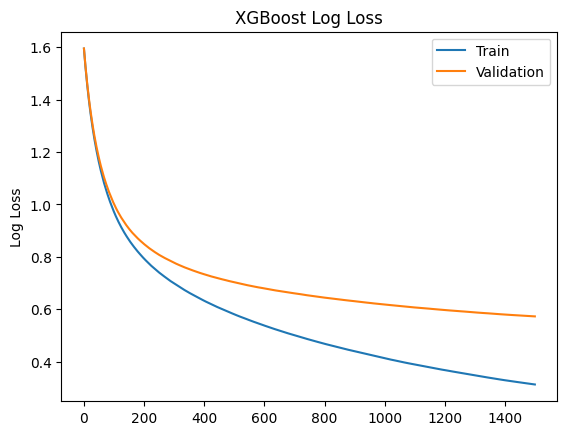

In [ ]:
import matplotlib.pyplot as plt
epochs = len(evals_result['validation_0']['mlogloss'])
x_axis = range(0, epochs)
plt.plot(x_axis, evals_result['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, evals_result['validation_1']['mlogloss'], label='Validation')
plt.legend(); plt.ylabel('Log Loss'); plt.title('XGBoost Log Loss'); plt.show()

* Saving model using pickle

In [ ]:
import pickle
with open("../Model/optimized_classification_model.pkl", 'wb') as file:
        pickle.dump(model, file)